In [28]:
# Importing Libraries
import selenium
import pandas as pd
import time
from bs4 import BeautifulSoup

# Importing selenium webdriver 
from selenium import webdriver

# Importing required Exceptions which needs to handled
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

#Importing requests
import requests

# importing regex
import re

In [29]:
driver=webdriver.Chrome("Desktop/chromedriver.exe")

In [30]:
from selenium.common.exceptions import StaleElementReferenceException, NoSuchElementException

driver.get("https://www.amazon.in/s?k=Phones&ref=nb_sb_noss_2")
start_page = 0
end_page = 18
urls = []
for page in range(start_page,end_page+1):
    try:
        page_urls = driver.find_elements_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a")
        
        # appending all the urls on current page to urls list
        for url in page_urls:
            url = url.get_attribute('href')     # Scraping the url from webelement
            if url[0:4]=='http':                # Checking if the scraped data is a valid url or not
                urls.append(url)                # Appending the url to urls list
        print("Product urls of page {} has been scraped.".format(page+1))
        
        nxt_button = driver.find_element_by_xpath("//li[@class='a-last']")      # Locating the next_button which is active
        if nxt_button.text == 'Next→':                                            # Checking if the button located is next button
            nxt_button.click()                                                    # Clicking the next button
            time.sleep(5)                                                         # time delay of 5 seconds
        # If the current active button is not next button, the we will check if the next button is inactive or not    
        elif driver.find_element_by_xpath("//html/body/div[1]/div[2]/div[1]/div/div[1]/div/span[3]/div[2]/div/div/span/div/div/div[2]/div[2]/div/div/div[1]/h2/a").text == 'Next→':    
            print("No new pages exist. Breaking the loop")  # Printing message and breakinf loop if we have reached the last page
            break
            
    except StaleElementReferenceException as e:             # Handling StaleElement Exception   
        print("Stale Exception")
        next_page = nxt_button.get_attribute('href')        # Extracting the url of next page
        driver.get(next_page)                           

Product urls of page 1 has been scraped.
Product urls of page 2 has been scraped.
Product urls of page 3 has been scraped.
Product urls of page 4 has been scraped.
Product urls of page 5 has been scraped.
Product urls of page 6 has been scraped.
Product urls of page 7 has been scraped.
Product urls of page 8 has been scraped.
Product urls of page 9 has been scraped.
Product urls of page 10 has been scraped.
Product urls of page 11 has been scraped.
Product urls of page 12 has been scraped.
Product urls of page 13 has been scraped.
Product urls of page 14 has been scraped.
Product urls of page 15 has been scraped.
Product urls of page 16 has been scraped.
Product urls of page 17 has been scraped.
Product urls of page 18 has been scraped.
Product urls of page 19 has been scraped.


In [31]:
for url in urls:
    driver.get(url)
    print("scraping URL = ", url)

scraping URL =  https://www.amazon.in/Redmi-9A-2GB-32GB-Storage/dp/B08696XB4B/ref=sr_1_3?dchild=1&keywords=Phones&qid=1626237369&sr=8-3
scraping URL =  https://www.amazon.in/Samsung-Galaxy-Storage-Additional-Exchange/dp/B086KDZGVK/ref=sr_1_4?dchild=1&keywords=Phones&qid=1626237369&sr=8-4
scraping URL =  https://www.amazon.in/Redmi-Note-Pebble-Grey-Storage/dp/B086977TR6/ref=sr_1_5?dchild=1&keywords=Phones&qid=1626237369&sr=8-5
scraping URL =  https://www.amazon.in/Samsung-Galaxy-Ocean-128GB-Storage/dp/B07HG8S7KP/ref=sr_1_6?dchild=1&keywords=Phones&qid=1626237369&sr=8-6
scraping URL =  https://www.amazon.in/Redmi-Note-10S/dp/B08LRDM44F/ref=sr_1_7?dchild=1&keywords=Phones&qid=1626237369&sr=8-7
scraping URL =  https://www.amazon.in/realme-Storage-Additional-Exchange-Offers/dp/B096RWS54N/ref=sr_1_8?dchild=1&keywords=Phones&qid=1626237369&sr=8-8
scraping URL =  https://www.amazon.in/Test-Exclusive_2020_1138-Multi-3GB-Storage/dp/B089MTR9JW/ref=sr_1_9?dchild=1&keywords=Phones&qid=1626237369&sr

In [32]:
len(urls)

302

In [33]:
urls_1=[]

In [34]:
for url in urls: 
    driver.get(url)
    try: 
        page_urls = driver.find_elements_by_xpath('/html/body/div[2]/div[2]/div[5]/div[39]/div/div/div[2]/div/div[2]/span[3]/div/div/div[4]/div[3]/div/div[1]/div/div/div[2]/a[2]')
        
        for url1 in page_urls:
            url1 = url1.get_attribute('href')
            if url1=='http':
                urls1.append(url1)
            print("scraping URL = ",url1)
            urls_1.append(url1)
            
    except StaleElementReferenceException as e:
        print("Stale Exception")

scraping URL =  https://www.amazon.in/gp/customer-reviews/R2BKDINI6JO085/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08696XB4B
scraping URL =  https://www.amazon.in/gp/customer-reviews/RTZLXSPVS94V3/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B086977TR6
scraping URL =  https://www.amazon.in/gp/customer-reviews/R1TWCJK86LRH45/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B07HG8S7KP
scraping URL =  https://www.amazon.in/gp/customer-reviews/R24KR047KAMHG2/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08LRDM44F
scraping URL =  https://www.amazon.in/gp/customer-reviews/RU9S7Z98IPYR8/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B096RWS54N
scraping URL =  https://www.amazon.in/gp/customer-reviews/R1GCPHCKU3XV5W/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B089MS7D8F
scraping URL =  https://www.amazon.in/gp/customer-reviews/R1U3J9UWQ7JS5Y/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697WT79
scraping URL =  https://www.amazon.in/gp/customer-reviews/R2BKDINI6JO085/ref=cm_cr_dp_d_rvw_ttl?ie=UTF8&ASIN=B08697N43G
scraping URL =  https://www.amazon.in/gp/c

In [35]:
rating=[]
review=[]

In [39]:
# this code will take approximately 15 to 16 hours
for url in urls_1:
    page=requests.get(url)
    soup=BeautifulSoup(page.content,'html.parser')
    page.content
    soup.prettify()
    driver.get(url)
    try:
        re=soup.find_all('span',class_='a-size-base review-text review-text-content')
        for i in re:
                review.append(i.get_text().replace('\n',''))
    except NoSuchElementException:
        review.append('-')
    
    try: 
            ra=soup.find_all('i',class_='review-rating')
            for j in ra:
                rating.append(j.get_text().replace('out of 5 stars',''))
    except NoSuchElementException:
            rating.append('-')

In [40]:
print(len(review),len(rating))

94 94


In [44]:
import pandas as pd
Rating1 = pd.DataFrame()
Rating1['Review']=review
Rating1['Rating']=rating

In [45]:
Rating1

Review Rating
0     Good phoneDecent look and looks stylishCamer...   5.0 
1     Both 13 MP and 5MP Camera quality is good. H...   1.0 
2     Pros:1. Light weight2. Detachable battery3. ...   3.0 
3                             Great photo Ossam phone   5.0 
4     If you are buying for parents, a big NO to t...   3.0 
..                                                ...    ...
89    Liked the quality of the product from OPPO a...   5.0 
90    Mobile is not good...camera not up to mark.....   1.0 
91                           Is phone ko koi mat lena   1.0 
92    This is good mobile.But sometime it's sound ...   3.0 
93    Guys don't buy this model of Xiaomi, coz the...   1.0 

[94 rows x 2 columns]

In [47]:
Rating1.to_csv('rating.csv')

In [48]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [49]:
rating=pd.read_csv('rating.csv')

In [50]:
rating.head()

Unnamed: 0                                             Review  Rating
0           0    Good phoneDecent look and looks stylishCamer...     5.0
1           1    Both 13 MP and 5MP Camera quality is good. H...     1.0
2           2    Pros:1. Light weight2. Detachable battery3. ...     3.0
3           3                            Great photo Ossam phone     5.0
4           4    If you are buying for parents, a big NO to t...     3.0

In [51]:
rating=rating.drop('Unnamed: 0',axis=1)

In [54]:
rating.head()

Review  Rating
0    Good phoneDecent look and looks stylishCamer...     5.0
1    Both 13 MP and 5MP Camera quality is good. H...     1.0
2    Pros:1. Light weight2. Detachable battery3. ...     3.0
3                            Great photo Ossam phone     5.0
4    If you are buying for parents, a big NO to t...     3.0

In [55]:
rating.Rating.unique()

array([5., 1., 3., 4., 2.])

In [56]:
#coverting float into int
rating['Rating']=rating['Rating'].astype(int, errors='ignore')

In [57]:
rating.Rating.unique()

array([5, 1, 3, 4, 2])

Review    0
Rating    0
dtype: int64
AxesSubplot(0.125,0.125;0.62x0.755)


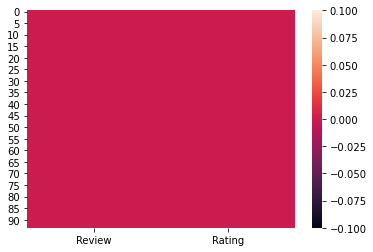

In [58]:
#checking null values
print(rating.isnull().sum())
print(sns.heatmap(rating.isnull()))

In [59]:
rating=rating.dropna()

In [60]:
#checking correlation in dataset
print(rating.corr())
print(sns.heatmap(rating.corr()))

        Rating
Rating     1.0
AxesSubplot(0.125,0.125;0.62x0.755)


In [61]:
#checking skew
rating.skew()

Rating   -0.236756
dtype: float64

In [62]:
sns.countplot(rating['Rating'])
plt.show()
print(rating['Rating'].value_counts())

1    29
5    26
4    24
3     8
2     7
Name: Rating, dtype: int64


In [63]:
from nltk.stem import WordNetLemmatizer
import nltk
from nltk.corpus import stopwords
import string

In [64]:
rating['length']=rating['Review'].str.len()
rating.head()

Review  Rating  length
0    Good phoneDecent look and looks stylishCamer...       5     140
1    Both 13 MP and 5MP Camera quality is good. H...       1     463
2    Pros:1. Light weight2. Detachable battery3. ...       3     380
3                            Great photo Ossam phone       5      25
4    If you are buying for parents, a big NO to t...       3     733

In [65]:
# Convert all messages to lower case
rating['Review'] = rating['Review'].str.lower()

# Replace email addresses with 'email'
rating['Reviewt'] = rating['Review'].str.replace(r'^.+@[^\.].*\.[a-z]{2,}$',
                                 'emailaddress')

# Replace URLs with 'webaddress'
rating['Review'] =rating['Review'].str.replace(r'^http\://[a-zA-Z0-9\-\.]+\.[a-zA-Z]{2,3}(/\S*)?$',
                                  'webaddress')

# Replace money symbols with 'moneysymb' (£ can by typed with ALT key + 156)
rating['Review'] = rating['Review'].str.replace(r'£|\$', 'dollers')
    
# Replace 10 digit phone numbers (formats include paranthesis, spaces, no spaces, dashes) with 'phonenumber'
rating['Review'] = rating['Review'].str.replace(r'^\(?[\d]{3}\)?[\s-]?[\d]{3}[\s-]?[\d]{4}$',
                                  'phonenumber')

    
# Replace numbers with 'numbr'
rating['Review'] = rating['Review'].str.replace(r'\d+(\.\d+)?', 'numbr')


rating['Review'] = rating['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in string.punctuation))

stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure'])
rating['Review'] = rating['Review'].apply(lambda x: ' '.join(
    term for term in x.split() if term not in stop_words))

lem=WordNetLemmatizer()
rating['Review'] = rating['Review'].apply(lambda x: ' '.join(
 lem.lemmatize(t) for t in x.split()))

In [67]:
rating['Review'] = rating.Review.str.len()

In [68]:
rating.columns

Index(['Review', 'Rating', 'length', 'Reviewt'], dtype='object')

In [69]:
rating.head()

Review  Rating  length                                            Reviewt
0     110       5     140    good phonedecent look and looks stylishcamer...
1     346       1     463    both 13 mp and 5mp camera quality is good. h...
2     344       3     380    pros:1. light weight2. detachable battery3. ...
3      23       5      25                            great photo ossam phone
4     582       3     733    if you are buying for parents, a big no to t...

In [70]:
rating=rating.drop('Review',axis=1)

In [71]:
rating=rating.drop('length',axis=1)

In [72]:
rating.head(20)

Rating                                            Reviewt
0        5    good phonedecent look and looks stylishcamer...
1        1    both 13 mp and 5mp camera quality is good. h...
2        3    pros:1. light weight2. detachable battery3. ...
3        5                            great photo ossam phone
4        3    if you are buying for parents, a big no to t...
5        4    i've been using this phone for 4days now.i w...
6        1    your browser does not support html5 video.  ...
7        1    not a good product i recommend not to buy th...
8        4    i've been using this phone for 4days now.i w...
9        4    i've been using this phone for 4days now.i w...
10       5    great product by redmi, but i request to red...
11       4    tecno spark 7 is best mobile ,this price ren...
12       4    i've been using this phone for 4days now.i w...
13       4    overall the phone is excellent as per the fe...
14       4                           this  product is so good
15       1    it's not 5g.its fake 5g phone. please please...
16       2    phone is not up to the mark,display is very ...
17       1    i just bought 2 days back and it's really ve...
18       5    i am writing the review after use of about 1...
19       2    phone is not up to the mark,display is very ...

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,roc_curve,roc_auc_score,auc
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,f1_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import  DecisionTreeClassifier
import warnings
warnings.filterwarnings('ignore')

In [74]:
#seprating into input and output variables
x=rating.drop(['Rating'],axis=1)

In [75]:
y=pd.DataFrame(rating['Rating'])

In [76]:
x.columns

Index(['Reviewt'], dtype='object')

In [77]:
x.head()

Reviewt
0    good phonedecent look and looks stylishcamer...
1    both 13 mp and 5mp camera quality is good. h...
2    pros:1. light weight2. detachable battery3. ...
3                            great photo ossam phone
4    if you are buying for parents, a big no to t...

In [78]:
y.head()

Rating
0       5
1       1
2       3
3       5
4       3

In [91]:
#convert text into vectors 
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec=TfidfVectorizer(max_features=10000,stop_words='english')
features=tf_vec.fit_transform(rating['Reviewt'])
x=features

In [92]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=56,test_size=.30)

In [93]:
from sklearn.model_selection import cross_val_score
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
       
        score=cross_val_score(m,x,y,cv=5)
        print('score of',m,'is:',score)
        print('Mean score:',score.mean())
        print('Standard deviation:',score.std())
        print('********************************************************************************')
        print('\n')

score of DecisionTreeClassifier() is: [0.84210526 0.68421053 0.52631579 0.68421053 0.44444444]
Mean score: 0.6362573099415204
Standard deviation: 0.1384570078093735
********************************************************************************


score of KNeighborsClassifier() is: [0.68421053 0.68421053 0.63157895 0.68421053 0.55555556]
Mean score: 0.647953216374269
Standard deviation: 0.05049598396473194
********************************************************************************


score of SVC() is: [0.57894737 0.73684211 0.63157895 0.57894737 0.38888889]
Mean score: 0.5830409356725146
Standard deviation: 0.11290639503836568
********************************************************************************


score of RandomForestClassifier() is: [0.78947368 0.63157895 0.63157895 0.73684211 0.44444444]
Mean score: 0.646783625730994
Standard deviation: 0.11821547385724705
********************************************************************************


score of AdaBoostClassifier(

In [100]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC(),RandomForestClassifier(),AdaBoostClassifier()]
for m in model:
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state= 0)
    m.fit(x_train,y_train)
    print('score of',m,'is:',m.score(x_train,y_train))
    predm=m.predict(x_test)
    print('score:')
    print('accuracy_score:',accuracy_score(y_test,predm))
    print('Confusion_matrix :',confusion_matrix(y_test,predm))
    print('Classification_report',classification_report(y_test,predm))
    print('********************************************************************************')
    print('\n')

score of DecisionTreeClassifier() is: 1.0
score:
accuracy_score: 0.631578947368421
Confusion_matrix : [[6 0 0 0 0]
 [0 2 0 0 0]
 [1 0 0 1 1]
 [1 0 1 2 1]
 [1 0 0 0 2]]
Classification_report               precision    recall  f1-score   support

           1       0.67      1.00      0.80         6
           2       1.00      1.00      1.00         2
           3       0.00      0.00      0.00         3
           4       0.67      0.40      0.50         5
           5       0.50      0.67      0.57         3

    accuracy                           0.63        19
   macro avg       0.57      0.61      0.57        19
weighted avg       0.57      0.63      0.58        19

********************************************************************************


score of KNeighborsClassifier() is: 0.68
score:
accuracy_score: 0.6842105263157895
Confusion_matrix : [[6 0 0 0 0]
 [0 2 0 0 0]
 [1 0 0 2 0]
 [2 0 0 3 0]
 [1 0 0 0 2]]
Classification_report               precision    recall  f1-score   su